# Seaborn Visualizations- New York City Bike 2022

## Importing Libraries and data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [2]:
from dotenv import load_dotenv 
import os  
load_dotenv() 

True

In [3]:
load_dotenv()

SAVE_PATH = os.getenv("SAVE_PATH")


In [4]:
# Get the full file path from .env
citibike_weather_path = os.getenv("CITIBIKE_2022_WEATHER")

# Read the CSV directly
citibike_weather_df = pd.read_csv(citibike_weather_path)

C:\Users\analy\AppData\Local\Temp\ipykernel_19444\4179577055.py:5: DtypeWarning: Columns (14,16) have mixed types. Specify dtype option on import or set low_memory=False.
  citibike_weather_df = pd.read_csv(citibike_weather_path)


In [5]:
citibike_weather_df.head()

,date,month,weekday,tavg,prcp,ride_id,member_casual,rideable_type,started_at,ended_at,...,start_hour,end_hour,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng
0,2022-01-01,1,Saturday,11.6,19.3,4A091640AEC83471,member,classic_bike,2022-01-01 16:01:22.082,2022-01-01 16:05:11.986,...,16,16,S 4 St & Wythe Ave,5204.05,Kent Ave & S 11 St,5062.01,40.712859,-73.965903,40.707645,-73.968415
1,2022-01-01,1,Saturday,11.6,19.3,7A560D6287C00126,member,classic_bike,2022-01-01 14:07:04.344,2022-01-01 14:31:57.500,...,14,14,Lexington Ave & E 120 St,7652.04,Amsterdam Ave & W 125 St,7800.03,40.801307,-73.939817,40.813358,-73.956461
2,2022-01-01,1,Saturday,11.6,19.3,4F6F726B809C15E4,member,classic_bike,2022-01-01 12:02:26.943,2022-01-01 12:14:13.555,...,12,12,Lexington Ave & E 120 St,7652.04,Amsterdam Ave & W 125 St,7800.03,40.801307,-73.939817,40.813358,-73.956461
3,2022-01-01,1,Saturday,11.6,19.3,3BC10DC94FD79955,member,classic_bike,2022-01-01 22:53:23.508,2022-01-01 23:18:42.881,...,22,23,Cleveland Pl & Spring St,5492.05,Mott St & Prince St,5561.04,40.722104,-73.997249,40.723180,-73.994800
4,2022-01-01,1,Saturday,11.6,19.3,FE4CE7F1CFFD7952,member,classic_bike,2022-01-01 08:04:51.755,2022-01-01 08:08:07.290,...,8,8,Central Park North & Adam Clayton Powell Blvd,7617.07,E 110 St & Madison Ave,7587.14,40.799484,-73.955613,40.796154,-73.947821


In [7]:
citibike_weather_df.columns

Index(['date', 'month', 'weekday', 'tavg', 'prcp', 'ride_id', 'member_casual',
       'rideable_type', 'started_at', 'ended_at', 'duration', 'start_hour',
       'end_hour', 'start_station_name', 'start_station_id',
       'end_station_name', 'end_station_id', 'start_lat', 'start_lng',
       'end_lat', 'end_lng'],
      dtype='object')

In [8]:
# converting the date Object to datetime
citibike_weather_df["date"] = pd.to_datetime(citibike_weather_df["date"])

## Top20 Starting Stations in New York through the week

In [49]:
Stations = citibike_weather_df.groupby("start_station_name")["ride_id"].count().reset_index()
Stations.shape

(1761, 2)

In [50]:
Top20= Stations.nlargest(20, 'ride_id')
Top20.head()

,start_station_name,ride_id
1587,W 21 St & 6 Ave,129016
1718,West St & Chambers St,123289
495,Broadway & W 58 St,114293
286,6 Ave & W 33 St,106440
8,1 Ave & E 68 St,104856


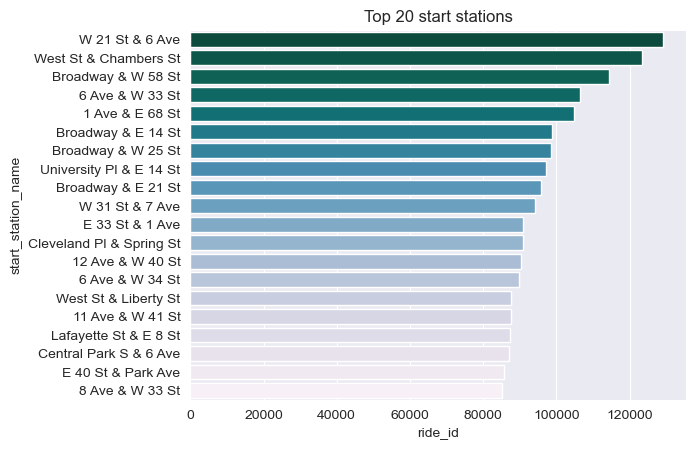

In [64]:
sns.barplot(
    data=Top20,
    x='ride_id',
    y='start_station_name',
    hue='start_station_name',   # required for palette
    dodge=False,                # keeps bars single, not grouped
    palette="PuBuGn_r"            
)
plt.legend([], [], frameon=False)  # hide legend
plt.title("Top 20 start stations")

# Save graph
save_path = os.path.join(SAVE_PATH, "Top 20 start stations.png")
plt.savefig(save_path, dpi=600)

plt.show()


### Top10 Starting Stations in New York- Weekday vs. Weekend

In [67]:
weakdays_rides = citibike_weather_df.groupby(["weekday", "start_station_name"])["ride_id"].count().reset_index()


In [66]:
top20_names = Top20["start_station_name"].unique()


In [68]:
weakdays_stations = weakdays_rides[
    weakdays_rides["start_station_name"].isin(top20_names)
]
weakdays_stations.head()

,weekday,start_station_name,ride_id
8,Friday,1 Ave & E 68 St,16776
24,Friday,11 Ave & W 41 St,13433
29,Friday,12 Ave & W 40 St,13271
286,Friday,6 Ave & W 33 St,15625
287,Friday,6 Ave & W 34 St,13405


In [69]:
pivot = weakdays_stations.pivot(
    index="start_station_name",
    columns="weekday",
    values="ride_id"
)


In [70]:
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
pivot = pivot[weekday_order]


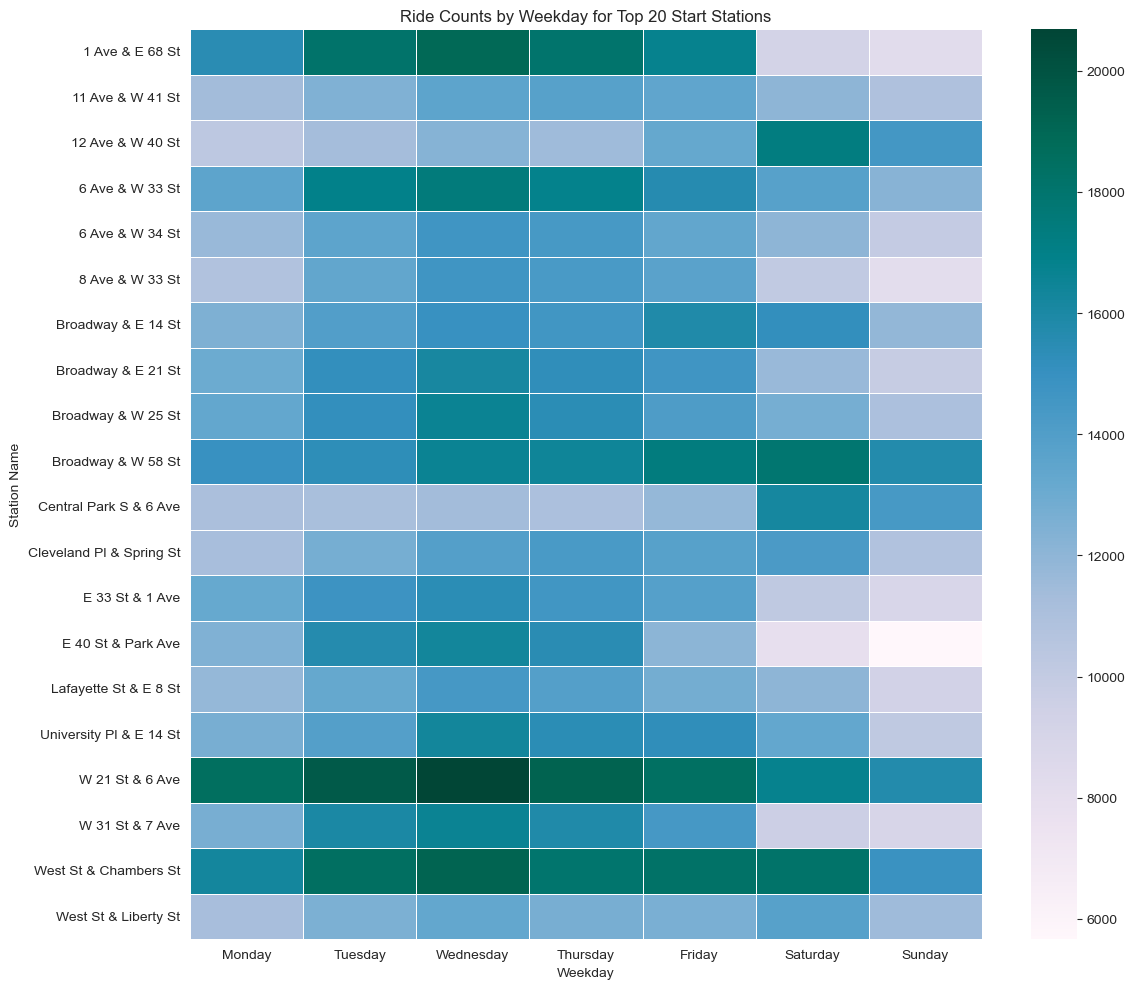

In [72]:
plt.figure(figsize=(12, 10))
sns.heatmap(
    pivot,
    cmap="PuBuGn",    
    linewidths=0.5,
    linecolor="white"
)
plt.title("Ride Counts by Weekday for Top 20 Start Stations")
plt.xlabel("Weekday")
plt.ylabel("Station Name")

# Save graph
save_path = os.path.join(SAVE_PATH, "Top20 Stations by Weekday.png")
plt.savefig(save_path, dpi=600)

plt.tight_layout()
plt.show()


## Monthly Rides Trend in 2022 vs. Tempratures

In [8]:
# Data aggregation
df_grouped = citibike_weather_df.groupby("date").agg(
    m_ride_count=("ride_id", "count"),
    m_avg_tavg=("tavg", "mean"),
   
)
df_grouped

,m_ride_count,m_avg_tavg
date,,
2022-01-01,20428,11.6
2022-01-02,43009,11.4
2022-01-03,33189,1.4
2022-01-04,36842,-2.7
2022-01-05,34230,3.2
...,...,...
2022-12-27,33044,-0.7
2022-12-28,44027,3.4
2022-12-29,51674,6.4


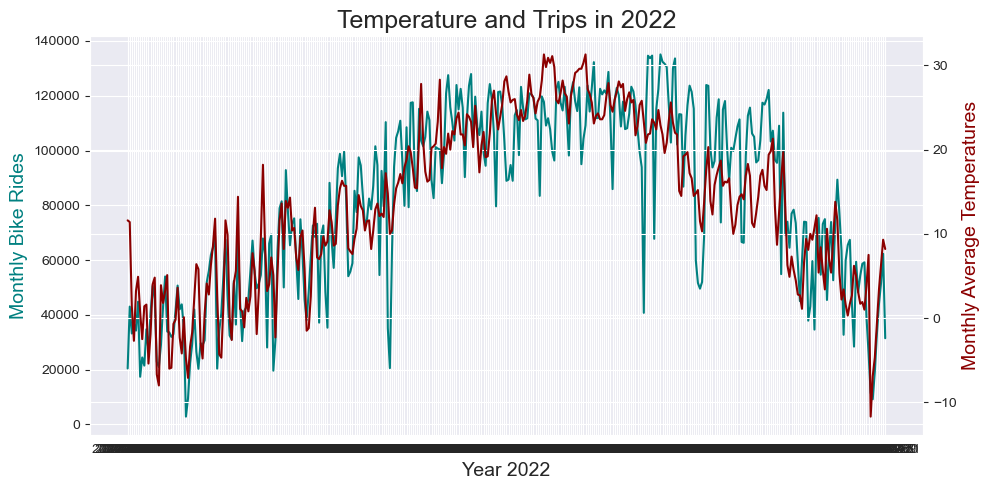

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))

# Plot bike rides
sns.lineplot(data = df_grouped['m_ride_count'], color = "teal")
ax.set_xlabel("Year 2022", fontname="Arial", fontsize=14)
ax.set_ylabel("Monthly Bike Rides", color="teal", fontname="Arial", fontsize=14)

# Second axis for temperature
ax2 = ax.twinx()
sns.lineplot(data = df_grouped['m_avg_tavg'], color="darkred", ax=ax2)
ax2.set_ylabel("Monthly Average Temperatures", color="darkred", fontname="Arial", fontsize=14)
plt.title("Temperature and Trips in 2022", fontname="Arial", fontsize=18)

# --- Force x-axis to show every month ---
import matplotlib.dates as mdates
if hasattr(df_grouped.index, "dtype") and "datetime" in str(df_grouped.index.dtype):
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
else:
    # If index is not datetime (e.g., 0–11)
    ax.set_xticks(range(len(df_grouped)))
    ax.set_xticklabels(df_grouped.index)
    
# Save graph
save_path = os.path.join(SAVE_PATH, "Temperature and Trips in 2022sns.png")
plt.savefig(save_path, dpi=600)

plt.tight_layout()
plt.show()


## Ride duration Histogramm

In [74]:
# 1. Convert the column to a proper timedelta
citibike_weather_df["duration"] = pd.to_timedelta(citibike_weather_df["duration"])

In [81]:
# 2. Cleaning the negative and extreme values that were found before in new df to avoid changing the original
duration_df = citibike_weather_df[["duration","rideable_type" ]].copy()
# Remove negative durations:
duration_df = duration_df[duration_df["duration"] >= pd.Timedelta(0)]
# Remove extremely long durations:
duration_df = duration_df[duration_df["duration"] <= pd.Timedelta(hours=2)]

In [82]:
duration_df["duration_min"] = duration_df["duration"].dt.total_seconds() / 60


In [83]:
duration_df.head()

,duration,rideable_type,duration_min
0,0 days 00:03:49.904000,classic_bike,3.831733
1,0 days 00:24:53.156000,classic_bike,24.885933
2,0 days 00:11:46.612000,classic_bike,11.776867
3,0 days 00:25:19.373000,classic_bike,25.322883
4,0 days 00:03:15.535000,classic_bike,3.258917


In [77]:
duration_df["duration"].describe()

count                     29668471
mean     0 days 00:14:00.777441831
std      0 days 00:12:53.429057190
min         0 days 00:00:08.930000
25%         0 days 00:05:46.516000
50%         0 days 00:10:06.101000
75%         0 days 00:17:47.712000
max         0 days 01:59:59.975000
Name: duration, dtype: object

In [92]:
sns.set_style('darkgrid')

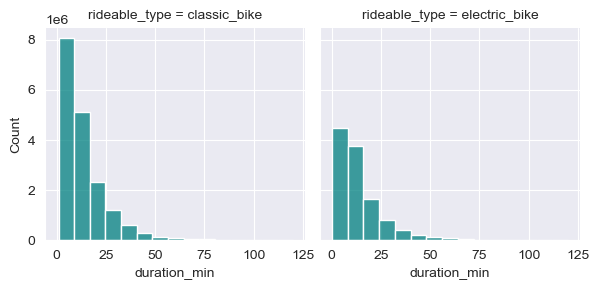

In [93]:
grid = sns.FacetGrid(duration_df, col = "rideable_type")
grid.map_dataframe(sns.histplot, "duration_min", bins = 15, color="#008080")

# Save graph
save_path = os.path.join(SAVE_PATH, "Rides duration distribution among Bike Types.png")
plt.savefig(save_path, dpi=600)

plt.show()

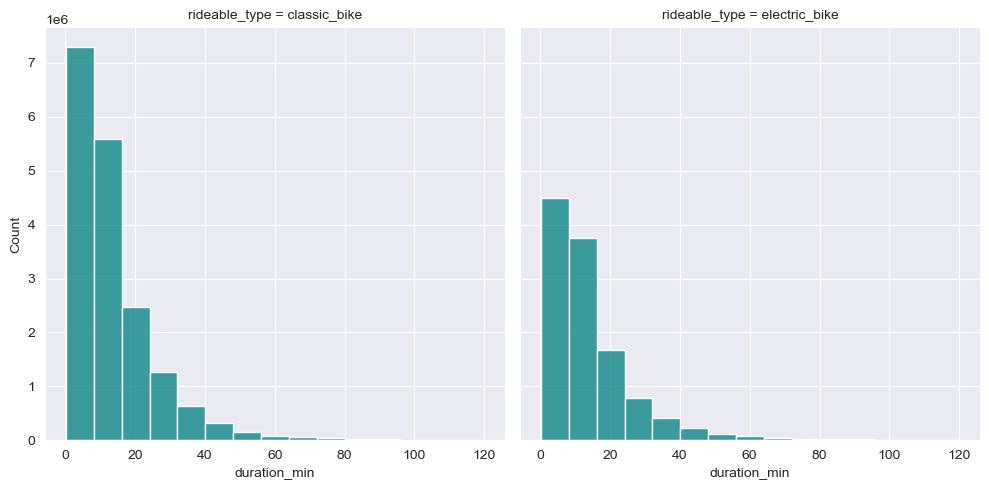

In [91]:
sns.displot(
    data=duration_df,
    x="duration_min",
    col="rideable_type",
    bins=15,
    color="#008080"
)


Two ways of ploting facetgrid. displot is more Automatik way and fasterbut it treats as one figure instaed of layout.

## Ride duration Violoin Plot among Bike Type

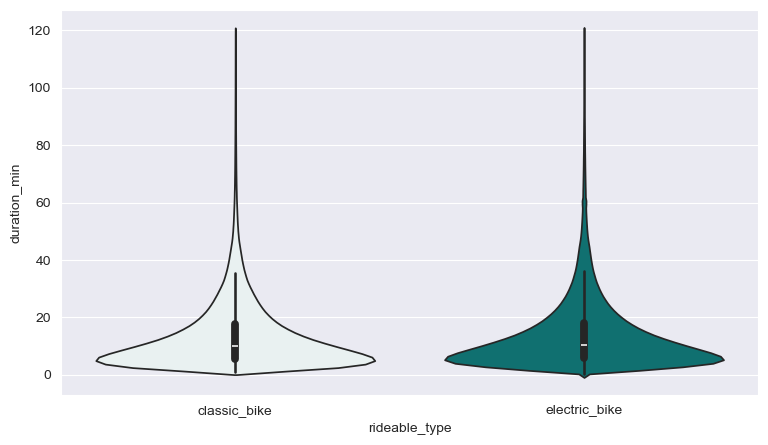

In [105]:
plt.figure(figsize=(9,5))

sns.violinplot(
    data=duration_df,
    x="rideable_type",
    y="duration_min",
    hue="rideable_type",      
    palette="light:teal",    
    dodge=False               # keeps each violin centered
)

plt.legend([], [], frameon=False)   # hide legend

# Save graph
save_path = os.path.join(SAVE_PATH, "Rides duration violinplot among Bike Types.png")
plt.savefig(save_path, dpi=600)

plt.show()


## User Types and Bike types Distribution

In [96]:
# Step 1: create the users table
users = citibike_weather_df.groupby(["rideable_type", "member_casual"]).size().unstack()

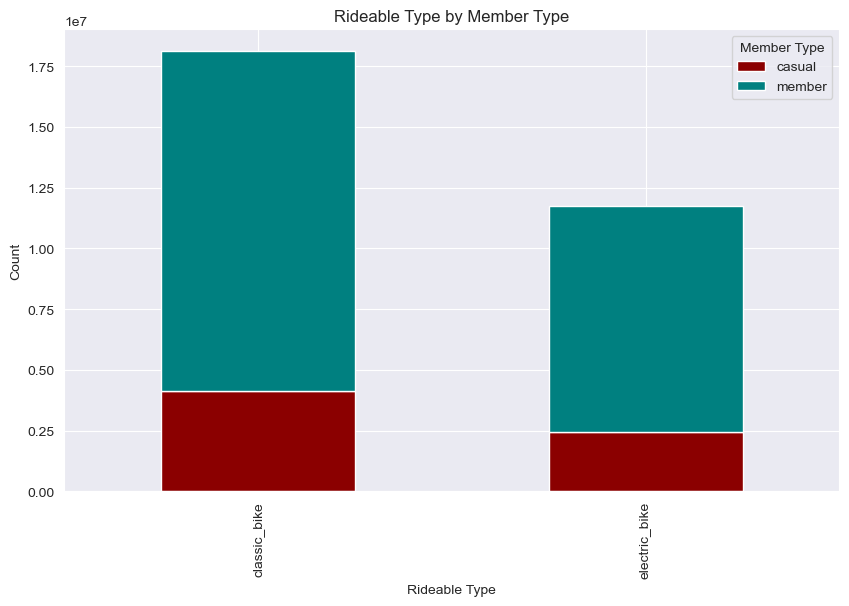

In [104]:
# Step 2: plot stacked bar 
users.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=["darkred", "teal"]
)
plt.title("Rideable Type by Member Type")
plt.xlabel("Rideable Type")
plt.ylabel("Count")

# Save graph
save_path = os.path.join(SAVE_PATH, "Rideable Type by Member Type.png")
plt.savefig(save_path, dpi=600)

plt.legend(title="Member Type")
plt.show()